Mini Project 3 Results:
1. All the columns had even distrubution except the gross margin percent which had almost 1 number for every entry. 
2. My dataset had no missing values.
3. I used label encoding for customer type, time of day, day name, and month name. This is because there is an implied order to those caegories. I used one hot encoding for the rest of the categorical columns, i.e. city, gender, product line, and payment method. I used this becaue these colomns have no implied order in there values.
4. I used the IQR method to remove outliers. I used this method because our data becuse most of the data was not normally distributed.
5. I standardized the data because it wa not very normally distributed.  I used the StandarScaler function in sklearn.
6. All my models performed very poorly. None of them even did close to decent. 
7. I think my model has a high amount of bias. My model performs very poor on the training set.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rawDF = pd.read_csv("WalmartSQL.csv")

rawDF.head()

,"invoice_id;""branch"";""city"";""customer_type"";""gender"";""product_line"";""unit_price"";""quantity"";""vat"";""total"";""dtme"";""tme"";""payment_method"";""cogs"";""gross_margin_pct"";""gross_income"";""rating"";""time_of_day"";""day_name"";""month_name"""
0,"750-67-8428;""A"";""Yangon"";""Member"";""Female"";""He..."
1,"226-31-3081;""C"";""Naypyitaw"";""Normal"";""Female"";..."
2,"631-41-3108;""A"";""Yangon"";""Normal"";""Male"";""Home..."
3,"123-19-1176;""A"";""Yangon"";""Member"";""Male"";""Heal..."
4,"373-73-7910;""A"";""Yangon"";""Normal"";""Male"";""Spor..."


In [3]:
#csv was seperated by semi-colons instead of commas so I used the 
#dilimiter input to change the delimiter.
rawDF = pd.read_csv("WalmartSQL.csv", delimiter=";")

rawDF.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,vat,total,dtme,tme,payment_method,cogs,gross_margin_pct,gross_income,rating,time_of_day,day_name,month_name
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05 00:00:00,13:08:00,Ewallet,522.83,4.7619,26.1415,9.1,afternoon,Saturday,January
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08 00:00:00,10:29:00,Cash,76.40,4.7619,3.8200,9.6,morning,Friday,March
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03 00:00:00,13:23:00,Credit card,324.31,4.7619,16.2155,7.4,afternoon,Sunday,March
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27 00:00:00,20:33:00,Ewallet,465.76,4.7619,23.2880,8.4,evening,Sunday,January
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08 00:00:00,10:37:00,Ewallet,604.17,4.7619,30.2085,5.3,morning,Friday,February


In [4]:
rawDF.isna().sum()

invoice_id          0
branch              0
city                0
customer_type       0
gender              0
product_line        0
unit_price          0
quantity            0
vat                 0
total               0
dtme                0
tme                 0
payment_method      0
cogs                0
gross_margin_pct    0
gross_income        0
rating              0
time_of_day         0
day_name            0
month_name          0
dtype: int64

In [5]:
rawDF["product_line"].value_counts()

product_line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

In [6]:
rawDF["city"].value_counts()

city
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

In [7]:
#dropping unrelated columns
rawDF = rawDF.drop(columns=["invoice_id", "branch", "dtme", "tme"])

In [8]:
rawDF.head()

,city,customer_type,gender,product_line,unit_price,quantity,vat,total,payment_method,cogs,gross_margin_pct,gross_income,rating,time_of_day,day_name,month_name
0,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.7619,26.1415,9.1,afternoon,Saturday,January
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.7619,3.8200,9.6,morning,Friday,March
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.7619,16.2155,7.4,afternoon,Sunday,March
3,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.7619,23.2880,8.4,evening,Sunday,January
4,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.7619,30.2085,5.3,morning,Friday,February


In [9]:
rawDF.isna().sum()


city                0
customer_type       0
gender              0
product_line        0
unit_price          0
quantity            0
vat                 0
total               0
payment_method      0
cogs                0
gross_margin_pct    0
gross_income        0
rating              0
time_of_day         0
day_name            0
month_name          0
dtype: int64

In [10]:
def makeBarValueCount(aDF, colName):
    aDF[colName].value_counts().plot(kind='bar', figsize=(7, 6))
    plt.xlabel(colName, labelpad=14)
    plt.ylabel("Count", labelpad=14)
    plt.title("Count for Each Entry in " + colName)

def makeHistValueCount(aDF, colName):
    plt.hist(aDF[colName])
    plt.xlabel(colName, labelpad=14)
    plt.ylabel("Frequency", labelpad=14)
    plt.title("Distribution of " + colName)
    plt.show()

In [11]:
ategoricalCol = ["city", "customer_type", "gender", "product_line", "payment_method", "time_of_day" ,"day_name",
                  "month_name"]

numericalCol = ["unit_price", "quantity", "vat", 
                "total", "cogs", "gross_margin_pct", "gross_income", "rating"]

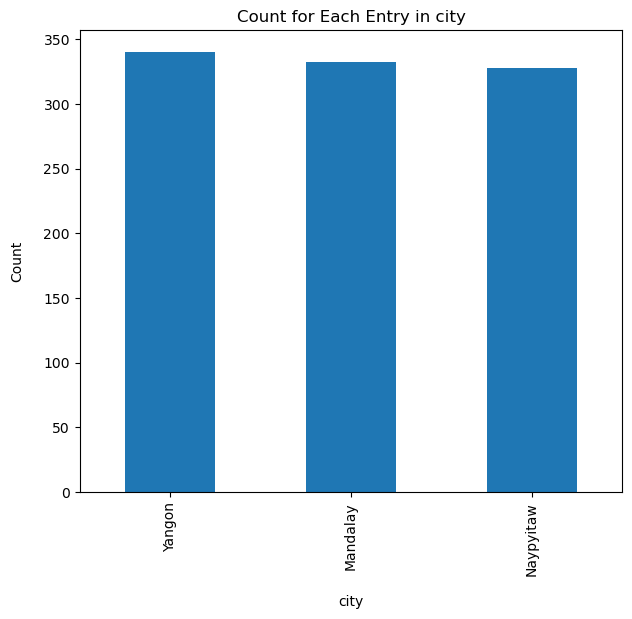

In [12]:
makeBarValueCount(rawDF, "city")

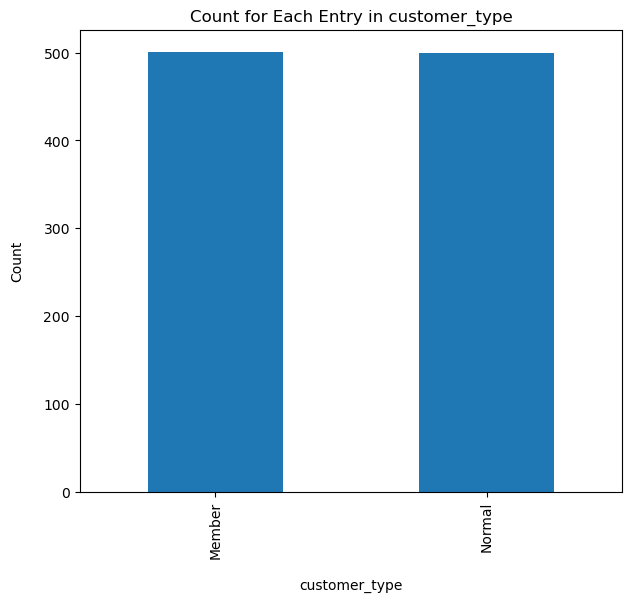

In [13]:
makeBarValueCount(rawDF, "customer_type")

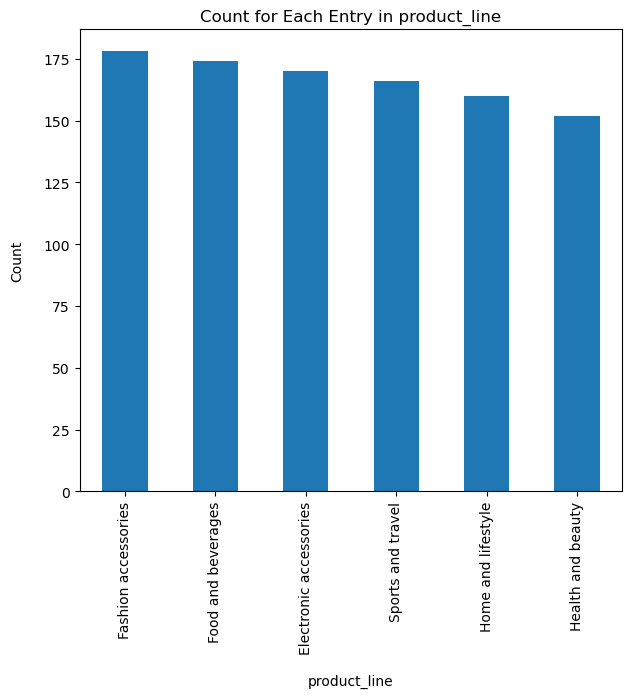

In [14]:
makeBarValueCount(rawDF, "product_line")

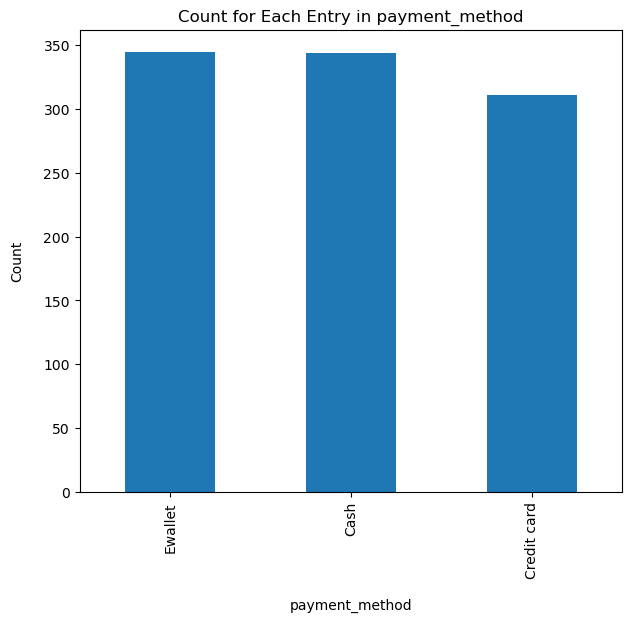

In [15]:
makeBarValueCount(rawDF, "payment_method")

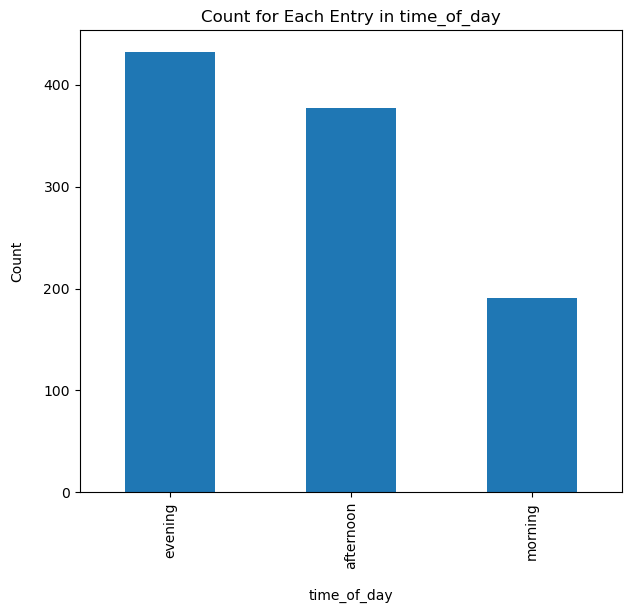

In [16]:
makeBarValueCount(rawDF, "time_of_day")

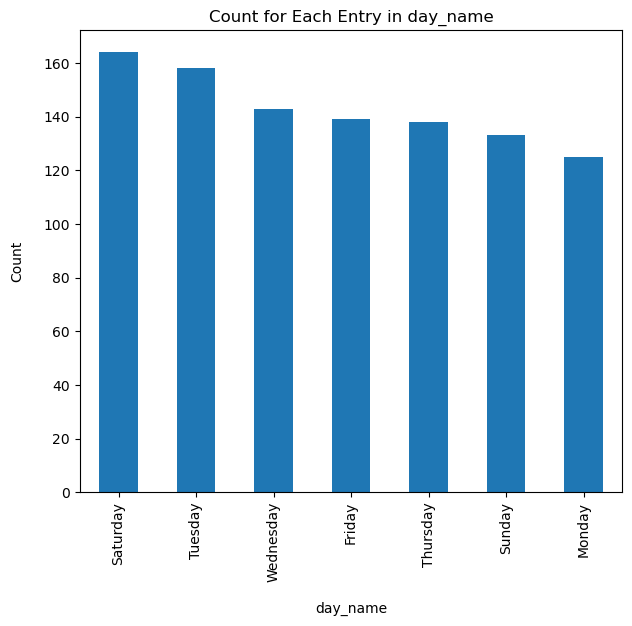

In [17]:
makeBarValueCount(rawDF, "day_name")

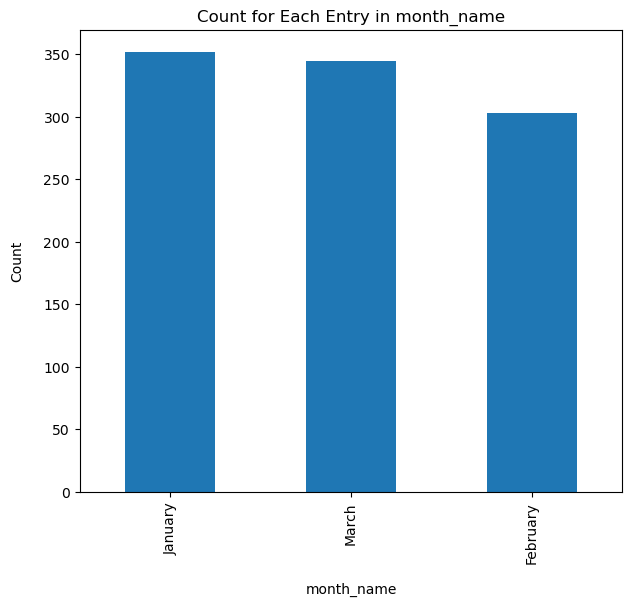

In [18]:
makeBarValueCount(rawDF, "month_name")

In [19]:
numericalCol

['unit_price',
 'quantity',
 'vat',
 'total',
 'cogs',
 'gross_margin_pct',
 'gross_income',
 'rating']

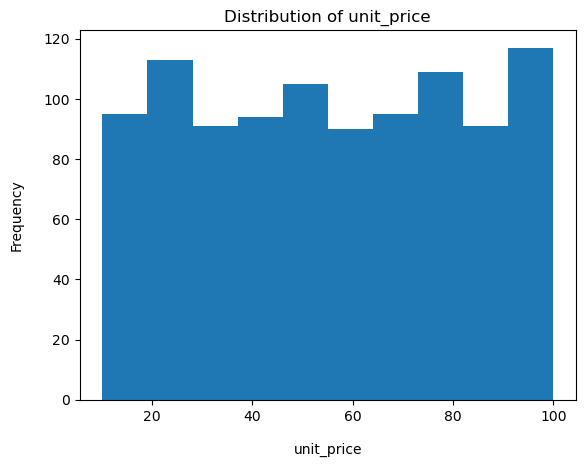

In [20]:
makeHistValueCount(rawDF, "unit_price")

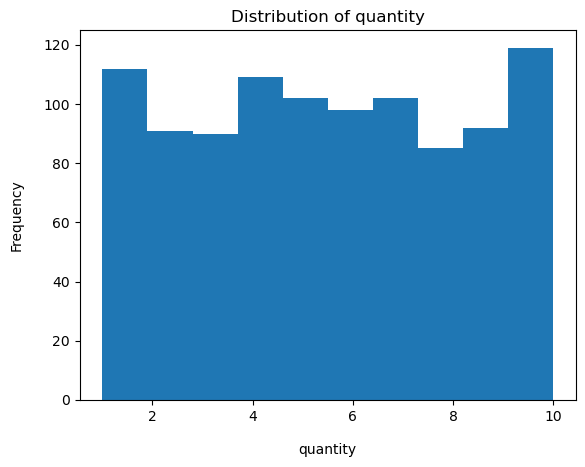

In [21]:
makeHistValueCount(rawDF, "quantity")

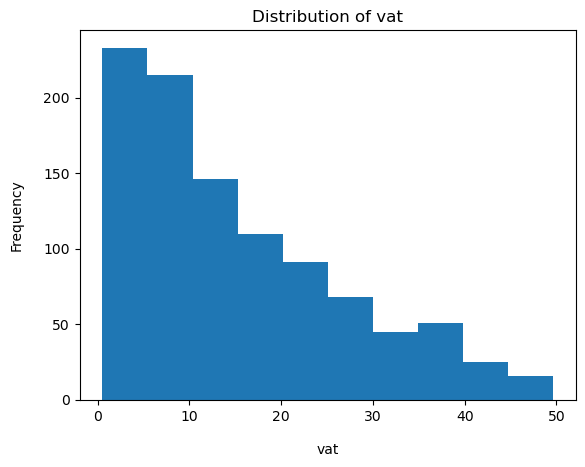

In [22]:
makeHistValueCount(rawDF, "vat")

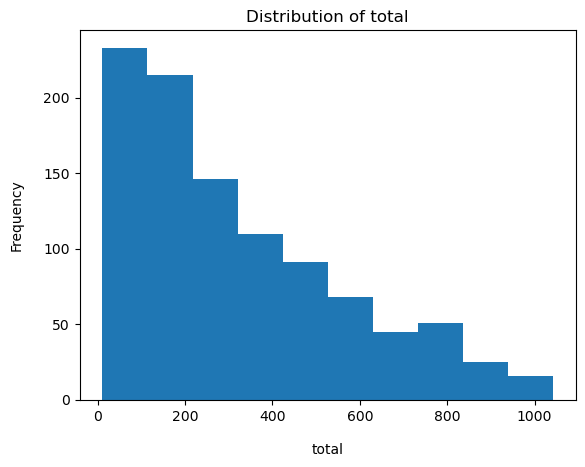

In [23]:
makeHistValueCount(rawDF, "total")

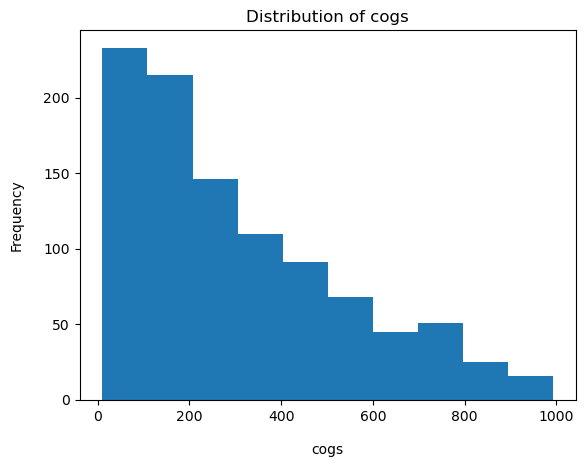

In [24]:
makeHistValueCount(rawDF, "cogs")

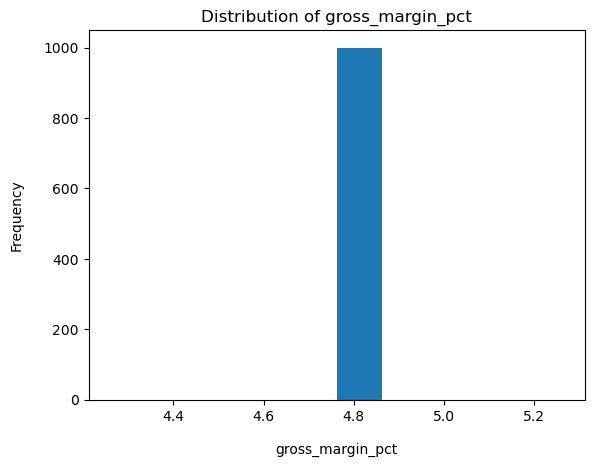

In [25]:
makeHistValueCount(rawDF, "gross_margin_pct")

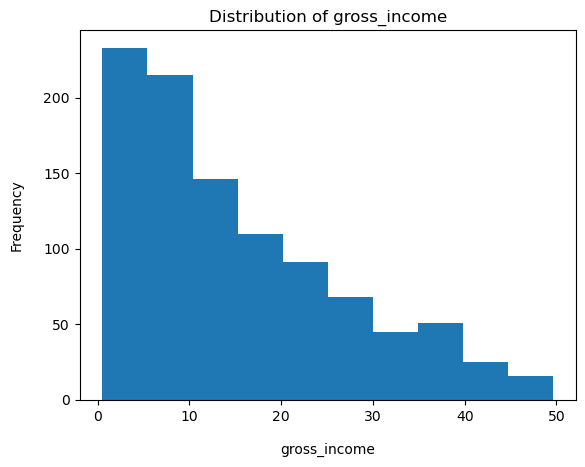

In [26]:
makeHistValueCount(rawDF, "gross_income")

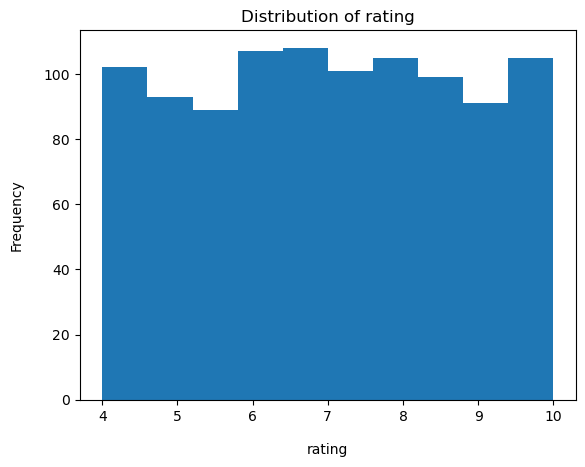

In [27]:
makeHistValueCount(rawDF, "rating")

In [28]:
def getLabelList(n):
    labelList = []
    for i in range(n):
        labelList.append(i)
    return labelList

In [29]:
monthList = ["January", "February", "March"]

In [30]:
rawDF["month_name"] = rawDF["month_name"].replace(monthList, getLabelList(len(monthList))).astype(float)

In [31]:
rawDF.head()

,city,customer_type,gender,product_line,unit_price,quantity,vat,total,payment_method,cogs,gross_margin_pct,gross_income,rating,time_of_day,day_name,month_name
0,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.7619,26.1415,9.1,afternoon,Saturday,0.0
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.7619,3.8200,9.6,morning,Friday,2.0
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.7619,16.2155,7.4,afternoon,Sunday,2.0
3,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.7619,23.2880,8.4,evening,Sunday,0.0
4,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.7619,30.2085,5.3,morning,Friday,1.0


In [32]:
rawDF["day_name"].value_counts()

day_name
Saturday     164
Tuesday      158
Wednesday    143
Friday       139
Thursday     138
Sunday       133
Monday       125
Name: count, dtype: int64

In [33]:
dayList = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [34]:
rawDF["day_name"] = rawDF["day_name"].replace(dayList, getLabelList(len(dayList))).astype(float)

In [35]:
rawDF.head()

,city,customer_type,gender,product_line,unit_price,quantity,vat,total,payment_method,cogs,gross_margin_pct,gross_income,rating,time_of_day,day_name,month_name
0,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.7619,26.1415,9.1,afternoon,5.0,0.0
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.7619,3.8200,9.6,morning,4.0,2.0
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.7619,16.2155,7.4,afternoon,6.0,2.0
3,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.7619,23.2880,8.4,evening,6.0,0.0
4,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.7619,30.2085,5.3,morning,4.0,1.0


In [36]:
memberList = ["Member", "Normal"]

In [37]:
rawDF["customer_type"] = rawDF["customer_type"].replace(memberList, getLabelList(len(memberList))).astype(float)

In [38]:
rawDF.head()

,city,customer_type,gender,product_line,unit_price,quantity,vat,total,payment_method,cogs,gross_margin_pct,gross_income,rating,time_of_day,day_name,month_name
0,Yangon,0.0,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.7619,26.1415,9.1,afternoon,5.0,0.0
1,Naypyitaw,1.0,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.7619,3.8200,9.6,morning,4.0,2.0
2,Yangon,1.0,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.7619,16.2155,7.4,afternoon,6.0,2.0
3,Yangon,0.0,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.7619,23.2880,8.4,evening,6.0,0.0
4,Yangon,1.0,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.7619,30.2085,5.3,morning,4.0,1.0


In [39]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
#sparse = False puts it in format where it can be dataframe later
encoder = OneHotEncoder(sparse_output=False)

#perform one-hot encoding on 'Country' column 
encodedData = encoder.fit_transform(rawDF[['city']])

encoder.categories_

[array(['Mandalay', 'Naypyitaw', 'Yangon'], dtype=object)]

In [40]:
oneHotCityDF = pd.DataFrame(encodedData, columns=encoder.categories_)

oneHotCityDF.head()

,Mandalay,Naypyitaw,Yangon
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [41]:
cleanedCityDF = pd.concat([rawDF, oneHotCityDF], axis=1).drop(columns = "city")

cleanedCityDF.head()

,customer_type,gender,product_line,unit_price,quantity,vat,total,payment_method,cogs,gross_margin_pct,gross_income,rating,time_of_day,day_name,month_name,"(Mandalay,)","(Naypyitaw,)","(Yangon,)"
0,0.0,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.7619,26.1415,9.1,afternoon,5.0,0.0,0.0,0.0,1.0
1,1.0,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.7619,3.8200,9.6,morning,4.0,2.0,0.0,1.0,0.0
2,1.0,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.7619,16.2155,7.4,afternoon,6.0,2.0,0.0,0.0,1.0
3,0.0,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.7619,23.2880,8.4,evening,6.0,0.0,0.0,0.0,1.0
4,1.0,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.7619,30.2085,5.3,morning,4.0,1.0,0.0,0.0,1.0


In [42]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
#sparse = False puts it in format where it can be dataframe later
encoder = OneHotEncoder(sparse_output=False)

#perform one-hot encoding on 'Country' column 
encodedData = encoder.fit_transform(cleanedCityDF[['gender']])

encoder.categories_

[array(['Female', 'Male'], dtype=object)]

In [43]:
oneGenderYearDF = pd.DataFrame(encodedData, columns=encoder.categories_)

oneGenderYearDF.head()

,Female,Male
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [44]:
cleanedCityGenderDF = pd.concat([cleanedCityDF, oneGenderYearDF], axis=1).drop(columns = "gender")

cleanedCityGenderDF.head()

,customer_type,product_line,unit_price,quantity,vat,total,payment_method,cogs,gross_margin_pct,gross_income,rating,time_of_day,day_name,month_name,"(Mandalay,)","(Naypyitaw,)","(Yangon,)","(Female,)","(Male,)"
0,0.0,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.7619,26.1415,9.1,afternoon,5.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.7619,3.8200,9.6,morning,4.0,2.0,0.0,1.0,0.0,1.0,0.0
2,1.0,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.7619,16.2155,7.4,afternoon,6.0,2.0,0.0,0.0,1.0,0.0,1.0
3,0.0,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.7619,23.2880,8.4,evening,6.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.7619,30.2085,5.3,morning,4.0,1.0,0.0,0.0,1.0,0.0,1.0


In [45]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
#sparse = False puts it in format where it can be dataframe later
encoder = OneHotEncoder(sparse_output=False)

#perform one-hot encoding on 'Country' column 
encodedData = encoder.fit_transform(cleanedCityGenderDF[['product_line']])

encoder.categories_

[array(['Electronic accessories', 'Fashion accessories',
        'Food and beverages', 'Health and beauty', 'Home and lifestyle',
        'Sports and travel'], dtype=object)]

In [46]:
oneGenderYearPLDF = pd.DataFrame(encodedData, columns=encoder.categories_)

oneGenderYearPLDF.head()

,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0


In [47]:
cleanedCityGenderPLDF = pd.concat([cleanedCityGenderDF, oneGenderYearPLDF], axis=1).drop(columns = "product_line")

cleanedCityGenderPLDF.head()

,customer_type,unit_price,quantity,vat,total,payment_method,cogs,gross_margin_pct,gross_income,rating,...,"(Naypyitaw,)","(Yangon,)","(Female,)","(Male,)","(Electronic accessories,)","(Fashion accessories,)","(Food and beverages,)","(Health and beauty,)","(Home and lifestyle,)","(Sports and travel,)"
0,0.0,74.69,7,26.1415,548.9715,Ewallet,522.83,4.7619,26.1415,9.1,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,15.28,5,3.8200,80.2200,Cash,76.40,4.7619,3.8200,9.6,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,46.33,7,16.2155,340.5255,Credit card,324.31,4.7619,16.2155,7.4,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,58.22,8,23.2880,489.0480,Ewallet,465.76,4.7619,23.2880,8.4,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,86.31,7,30.2085,634.3785,Ewallet,604.17,4.7619,30.2085,5.3,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [48]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
#sparse = False puts it in format where it can be dataframe later
encoder = OneHotEncoder(sparse_output=False)

#perform one-hot encoding on 'Country' column 
encodedData = encoder.fit_transform(cleanedCityGenderPLDF[['payment_method']])

encoder.categories_

[array(['Cash', 'Credit card', 'Ewallet'], dtype=object)]

In [49]:
oneGenderYearPLPayDF = pd.DataFrame(encodedData, columns=encoder.categories_)

oneGenderYearPLPayDF.head()

,Cash,Credit card,Ewallet
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [50]:
cleanedCityGenderPLPayDF = pd.concat([cleanedCityGenderPLDF, oneGenderYearPLPayDF], axis=1).drop(columns = "payment_method")

cleanedCityGenderPLPayDF.head()

,customer_type,unit_price,quantity,vat,total,cogs,gross_margin_pct,gross_income,rating,time_of_day,...,"(Male,)","(Electronic accessories,)","(Fashion accessories,)","(Food and beverages,)","(Health and beauty,)","(Home and lifestyle,)","(Sports and travel,)","(Cash,)","(Credit card,)","(Ewallet,)"
0,0.0,74.69,7,26.1415,548.9715,522.83,4.7619,26.1415,9.1,afternoon,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,15.28,5,3.8200,80.2200,76.40,4.7619,3.8200,9.6,morning,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,46.33,7,16.2155,340.5255,324.31,4.7619,16.2155,7.4,afternoon,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,58.22,8,23.2880,489.0480,465.76,4.7619,23.2880,8.4,evening,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,86.31,7,30.2085,634.3785,604.17,4.7619,30.2085,5.3,morning,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [51]:
cleanedDF = cleanedCityGenderPLPayDF

In [52]:
timOfDayList = ["morning", "afternoon", "evening"]

In [53]:
cleanedDF["time_of_day"] = cleanedDF["time_of_day"].replace(timOfDayList, getLabelList(len(timOfDayList))).astype(float)

In [54]:
cleanedDF.head()

,customer_type,unit_price,quantity,vat,total,cogs,gross_margin_pct,gross_income,rating,time_of_day,...,"(Male,)","(Electronic accessories,)","(Fashion accessories,)","(Food and beverages,)","(Health and beauty,)","(Home and lifestyle,)","(Sports and travel,)","(Cash,)","(Credit card,)","(Ewallet,)"
0,0.0,74.69,7,26.1415,548.9715,522.83,4.7619,26.1415,9.1,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,15.28,5,3.8200,80.2200,76.40,4.7619,3.8200,9.6,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,46.33,7,16.2155,340.5255,324.31,4.7619,16.2155,7.4,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,58.22,8,23.2880,489.0480,465.76,4.7619,23.2880,8.4,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,86.31,7,30.2085,634.3785,604.17,4.7619,30.2085,5.3,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Text(0.5, 1.0, 'Box Plot of the unit price')

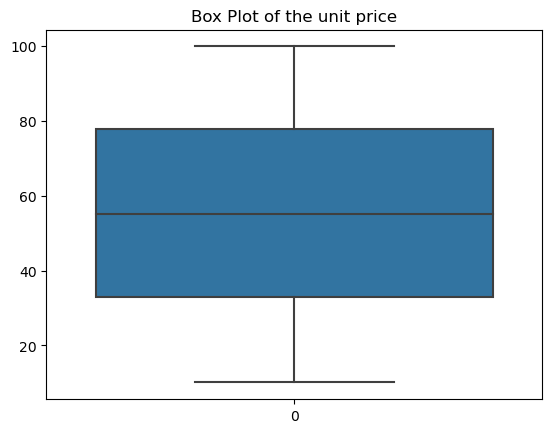

In [55]:
import seaborn as sns 

sns.boxplot(cleanedDF["unit_price"])
plt.title("Box Plot of the unit price")

Text(0.5, 1.0, 'Box Plot of the quantity')

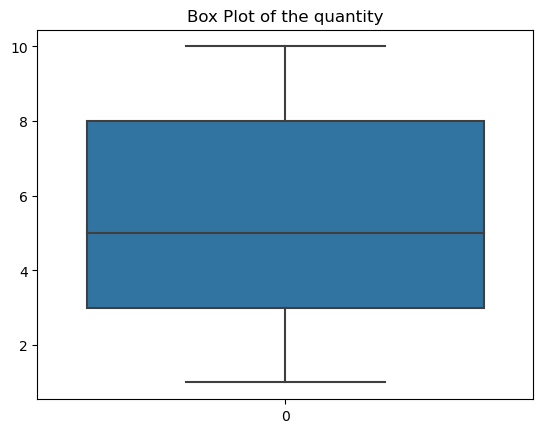

In [56]:
sns.boxplot(cleanedDF["quantity"])
plt.title("Box Plot of the quantity")

Text(0.5, 1.0, 'Box Plot of the vat')

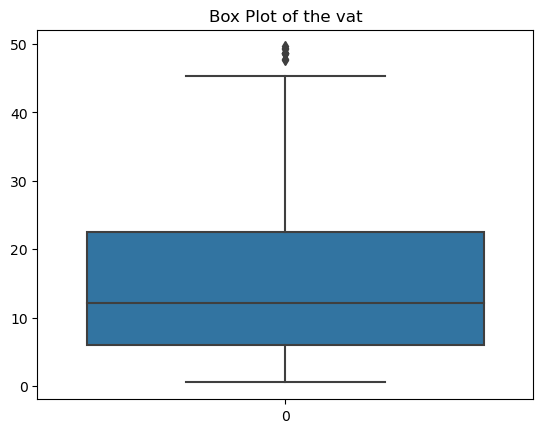

In [57]:
sns.boxplot(cleanedDF["vat"])
plt.title("Box Plot of the vat")

Text(0.5, 1.0, 'Box Plot of the total')

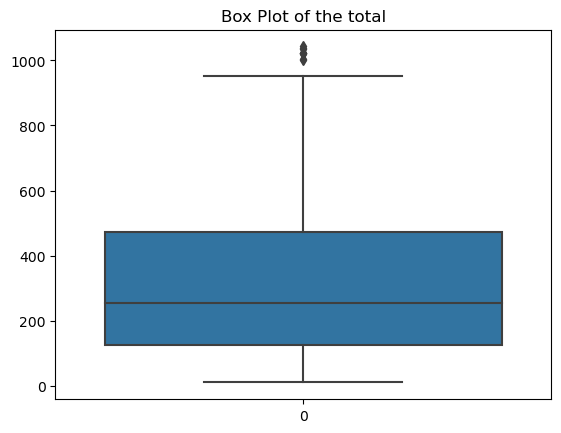

In [58]:
sns.boxplot(cleanedDF["total"])
plt.title("Box Plot of the total")

In [59]:
numericalCol

['unit_price',
 'quantity',
 'vat',
 'total',
 'cogs',
 'gross_margin_pct',
 'gross_income',
 'rating']

Text(0.5, 1.0, 'Box Plot of the gross margin percent')

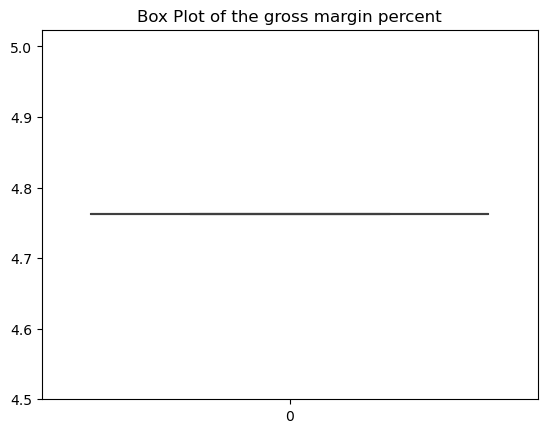

In [60]:
sns.boxplot(cleanedDF["gross_margin_pct"])
plt.title("Box Plot of the gross margin percent")

Text(0.5, 1.0, 'Box Plot of the gross income')

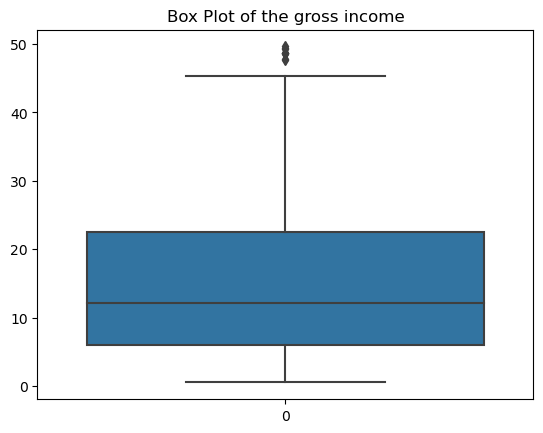

In [61]:
sns.boxplot(cleanedDF["gross_income"])
plt.title("Box Plot of the gross income")

Text(0.5, 1.0, 'Box Plot of the rating')

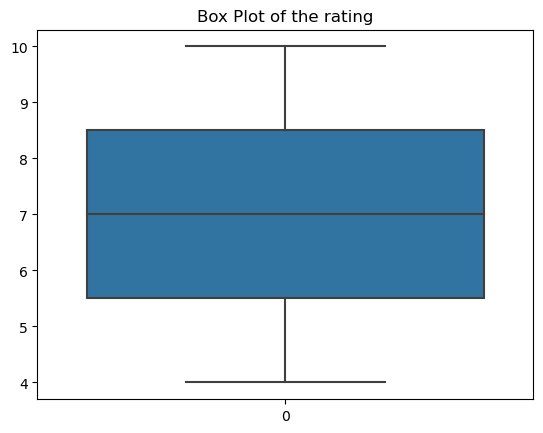

In [62]:
sns.boxplot(cleanedDF["rating"])
plt.title("Box Plot of the rating")

In [63]:
outliers = ["vat", "total", "gross_income"]

In [64]:
import numpy as np

Q1 = np.percentile(cleanedDF['vat'], 25, method='midpoint')
Q3 = np.percentile(cleanedDF['vat'], 75, method='midpoint')

IQR = Q3 - Q1

IQR

16.56575

In [65]:
maxThreshold = Q3+1.5*IQR
minThreshold = Q1-1.5*IQR

iqrDF = cleanedDF[cleanedDF["vat"] < maxThreshold]
iqrDF = iqrDF[iqrDF["vat"] > minThreshold]


In [66]:
import numpy as np

Q1 = np.percentile(cleanedDF['total'], 25, method='midpoint')
Q3 = np.percentile(cleanedDF['total'], 75, method='midpoint')

IQR = Q3 - Q1

IQR

347.8807499999999

In [67]:
maxThreshold = Q3+1.5*IQR
minThreshold = Q1-1.5*IQR

iqrDF = cleanedDF[cleanedDF["total"] < maxThreshold]
iqrDF = iqrDF[iqrDF["total"] > minThreshold]


In [68]:
import numpy as np

Q1 = np.percentile(cleanedDF['gross_income'], 25, method='midpoint')
Q3 = np.percentile(cleanedDF['gross_income'], 75, method='midpoint')

IQR = Q3 - Q1

IQR

16.56575

In [69]:
maxThreshold = Q3+1.5*IQR
minThreshold = Q1-1.5*IQR

iqrDF = cleanedDF[cleanedDF["gross_income"] < maxThreshold]
iqrDF = iqrDF[iqrDF["gross_income"] > minThreshold]


In [70]:
iqrDF.head()

,customer_type,unit_price,quantity,vat,total,cogs,gross_margin_pct,gross_income,rating,time_of_day,...,"(Male,)","(Electronic accessories,)","(Fashion accessories,)","(Food and beverages,)","(Health and beauty,)","(Home and lifestyle,)","(Sports and travel,)","(Cash,)","(Credit card,)","(Ewallet,)"
0,0.0,74.69,7,26.1415,548.9715,522.83,4.7619,26.1415,9.1,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,15.28,5,3.8200,80.2200,76.40,4.7619,3.8200,9.6,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,46.33,7,16.2155,340.5255,324.31,4.7619,16.2155,7.4,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,58.22,8,23.2880,489.0480,465.76,4.7619,23.2880,8.4,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,86.31,7,30.2085,634.3785,604.17,4.7619,30.2085,5.3,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [71]:
numericalCol

['unit_price',
 'quantity',
 'vat',
 'total',
 'cogs',
 'gross_margin_pct',
 'gross_income',
 'rating']

In [72]:
# standardization 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#initialize the DF
standardizedDF = iqrDF

standardizedDF[["unit_price", "quantity", 
                "vat", "total", "cogs",
                "gross_margin_pct", "gross_income", "rating"]] = scaler.fit_transform(iqrDF[["unit_price", "quantity", 
                "vat", "total", "cogs",
                "gross_margin_pct", "gross_income", "rating"]])

standardizedDF.head()

,customer_type,unit_price,quantity,vat,total,cogs,gross_margin_pct,gross_income,rating,time_of_day,...,"(Male,)","(Electronic accessories,)","(Fashion accessories,)","(Food and beverages,)","(Health and beauty,)","(Home and lifestyle,)","(Sports and travel,)","(Cash,)","(Credit card,)","(Ewallet,)"
0,0.0,0.737595,0.527206,0.978017,0.978017,0.978017,8.881784e-16,0.978017,1.235531,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,-1.521483,-0.161602,-0.994929,-0.994929,-0.994929,8.881784e-16,-0.994929,1.526891,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,-0.340800,0.527206,0.100681,0.100681,0.100681,8.881784e-16,0.100681,0.244907,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.111319,0.871610,0.725803,0.725803,0.725803,8.881784e-16,0.725803,0.827627,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.179448,0.527206,1.337490,1.337490,1.337490,8.881784e-16,1.337490,-0.978805,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [73]:
xDF = standardizedDF.drop(columns=["rating"])

xDF.head()

,customer_type,unit_price,quantity,vat,total,cogs,gross_margin_pct,gross_income,time_of_day,day_name,...,"(Male,)","(Electronic accessories,)","(Fashion accessories,)","(Food and beverages,)","(Health and beauty,)","(Home and lifestyle,)","(Sports and travel,)","(Cash,)","(Credit card,)","(Ewallet,)"
0,0.0,0.737595,0.527206,0.978017,0.978017,0.978017,8.881784e-16,0.978017,1.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,-1.521483,-0.161602,-0.994929,-0.994929,-0.994929,8.881784e-16,-0.994929,0.0,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,-0.340800,0.527206,0.100681,0.100681,0.100681,8.881784e-16,0.100681,1.0,6.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.111319,0.871610,0.725803,0.725803,0.725803,8.881784e-16,0.725803,2.0,6.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.179448,0.527206,1.337490,1.337490,1.337490,8.881784e-16,1.337490,0.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [74]:
yDF = pd.DataFrame(standardizedDF["rating"])

yDF.head()

,rating
0,1.235531
1,1.526891
2,0.244907
3,0.827627
4,-0.978805


In [75]:
xDF.columns = xDF.columns.astype(str)

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(xDF, 
                                                yDF, 
                                                test_size=0.30)

model = LinearRegression().fit(xTrain, yTrain)

In [79]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import root_mean_squared_error


In [94]:
preds = model.predict(xTest)

print(r2_score(yTest, preds))
print(mean_absolute_error(yTest, preds))
print(mean_squared_error(yTest, preds, squared=False))

-0.21496508911130086
0.9297635249737538
1.1077880513262401


In [95]:
from sklearn import svm

model = svm.SVR().fit(xTrain, yTrain)

preds = model.predict(xTest)

print(r2_score(yTest, preds))
print(mean_absolute_error(yTest, preds))
print(mean_squared_error(yTest, preds, squared=False))

-0.11323971986950587
0.9027577483273824
1.0603985462205017


/Users/blakecampbell/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [96]:
from sklearn import tree

model = tree.DecisionTreeRegressor().fit(xTrain, yTrain)

preds = model.predict(xTest)

print(r2_score(yTest, preds))
print(mean_absolute_error(yTest, preds))
print(mean_squared_error(yTest, preds, squared=False))

-1.2417469231583436
1.2323155159368857
1.5047628758413858


In [97]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor().fit(xTrain, yTrain)

preds = model.predict(xTest)

print(r2_score(yTest, preds))
print(mean_absolute_error(yTest, preds))
print(mean_squared_error(yTest, preds, squared=False))

/Users/blakecampbell/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.2718769500646341
0.963454062418059
1.1334368425839008


/Users/blakecampbell/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
